In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [14]:


# --- Utilities ---
def scale_and_split(df_state):
    df_state = df_state.drop(columns=['state', 'month'], errors='ignore')

    imputer = SimpleImputer()
    df_imputed = pd.DataFrame(imputer.fit_transform(df_state), columns=df_state.columns)

    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_state.columns)

    total_len = len(df_scaled)
    train_end = int(0.7 * total_len)
    

    df_train = df_scaled.iloc[:train_end]
    df_test = df_scaled.iloc[train_end:]

    return df_train, df_test, scaler, imputer

def create_sequences(data, window):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data.iloc[i:i+window][input_features].values)
        y.append(data.iloc[i+window][target_col])
    return np.array(X), np.array(y)

def build_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# --- Train + Evaluate per State ---


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
✅ Alabama: RMSE = 0.1460, R² = 0.1928


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
✅ Alaska: RMSE = 0.1249, R² = 0.4933


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ Arizona: RMSE = 0.1245, R² = 0.3101


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ Arkansas: RMSE = 0.1453, R² = 0.3247


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
✅ California: RMSE = 0.1436, R² = 0.3539


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
✅ Colorado: RMSE = 0.2002, R² = -0.3093


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
✅ Connecticut: RMSE = 0.1128, R² = 0.6261


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
✅ Delaware: RMSE = 0.1333, R² = 0.1811


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
✅ District of Columbia: RMSE = 0.0906, R² = 0.7034


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ Florida: RMSE = 0.1403, R² = 0.3362


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ Georgia: RMSE = 0.1429, R² = 0.3374


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
✅ Hawaii: RMSE = 0.1241, R² = 0.4109


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
✅ Idaho: RMSE = 0.1381, R² = -0.0095


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
✅ Illinois: RMSE = 0.1251, R² = 0.1819


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
✅ Indiana: RMSE = 0.1210, R² = 0.0700


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ Iowa: RMSE = 0.1019, R² = 0.3466


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
✅ Kansas: RMSE = 0.1234, R² = -0.0274


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
✅ Kentucky: RMSE = 0.1562, R² = -0.7231


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
✅ Louisiana: RMSE = 0.1353, R² = 0.2883


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ Maine: RMSE = 0.1361, R² = 0.4235


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
✅ Maryland: RMSE = 0.1165, R² = 0.6733


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
✅ Massachusetts: RMSE = 0.1495, R² = -0.0442


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ Michigan: RMSE = 0.1314, R² = -0.0196


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
✅ Minnesota: RMSE = 0.1299, R² = 0.1224


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
✅ Mississippi: RMSE = 0.1112, R² = 0.4025


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
✅ Missouri: RMSE = 0.1386, R² = 0.2153


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
✅ Montana: RMSE = 0.1146, R² = 0.1650


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
✅ Nebraska: RMSE = 0.0953, R² = 0.3292


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
✅ Nevada: RMSE = 0.1149, R² = 0.2123


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
✅ New Hampshire: RMSE = 0.1011, R² = 0.3377


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
✅ New Jersey: RMSE = 0.1394, R² = 0.3758


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
✅ New Mexico: RMSE = 0.0813, R² = 0.8845


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
✅ New York: RMSE = 0.1289, R² = 0.4092


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
✅ North Carolina: RMSE = 0.1234, R² = 0.2054


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
✅ North Dakota: RMSE = 0.0883, R² = 0.6311


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
✅ Ohio: RMSE = 0.1149, R² = 0.1699


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
✅ Oklahoma: RMSE = 0.1125, R² = 0.2542


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ Oregon: RMSE = 0.1658, R² = -0.1318


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ Pennsylvania: RMSE = 0.0867, R² = 0.6135


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
✅ Rhode Island: RMSE = 0.1256, R² = 0.3798


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
✅ South Carolina: RMSE = 0.1346, R² = 0.3082


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
✅ South Dakota: RMSE = 0.1033, R² = 0.3152


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
✅ Tennessee: RMSE = 0.1078, R² = 0.4510


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
✅ Texas: RMSE = 0.1336, R² = 0.2276


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ Utah: RMSE = 0.1359, R² = -0.2870


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ Vermont: RMSE = 0.0975, R² = 0.3007


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
✅ Virginia: RMSE = 0.0935, R² = 0.6095


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
✅ Washington: RMSE = 0.1101, R² = 0.2491


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
✅ West Virginia: RMSE = 0.1087, R² = 0.3099


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
✅ Wisconsin: RMSE = 0.1209, R² = 0.1878


/opt/anaconda3/envs/RISE_PROJECT/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
✅ Wyoming: RMSE = 0.0768, R² = 0.7254


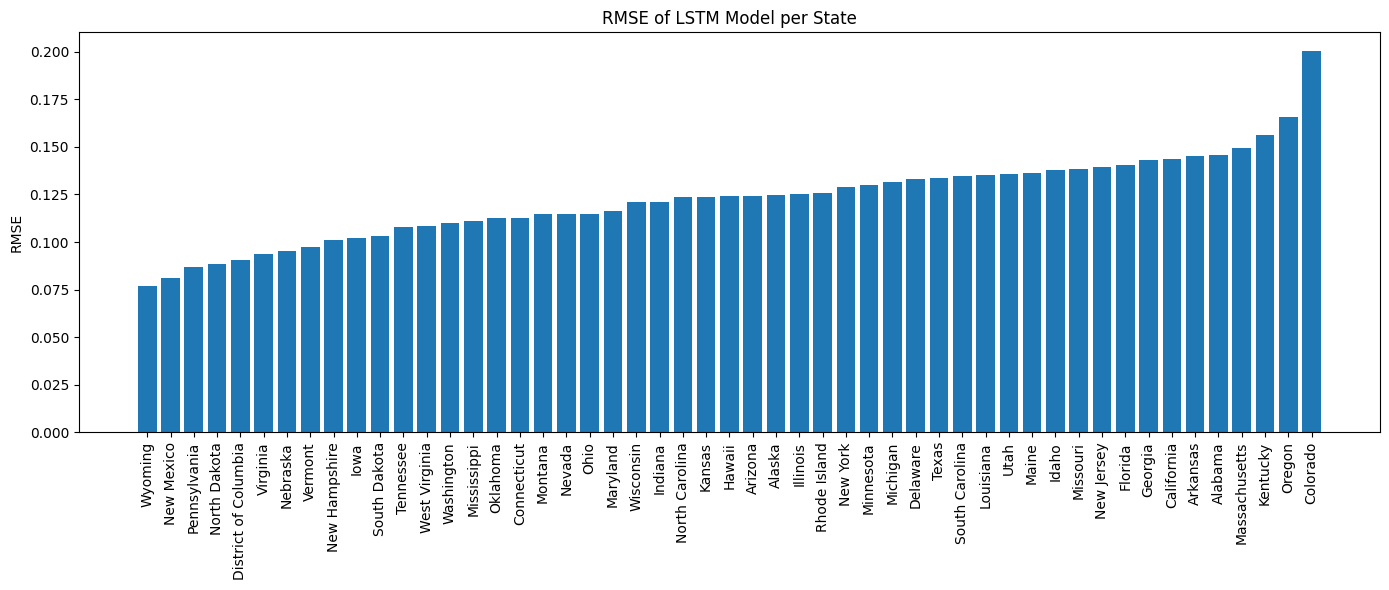

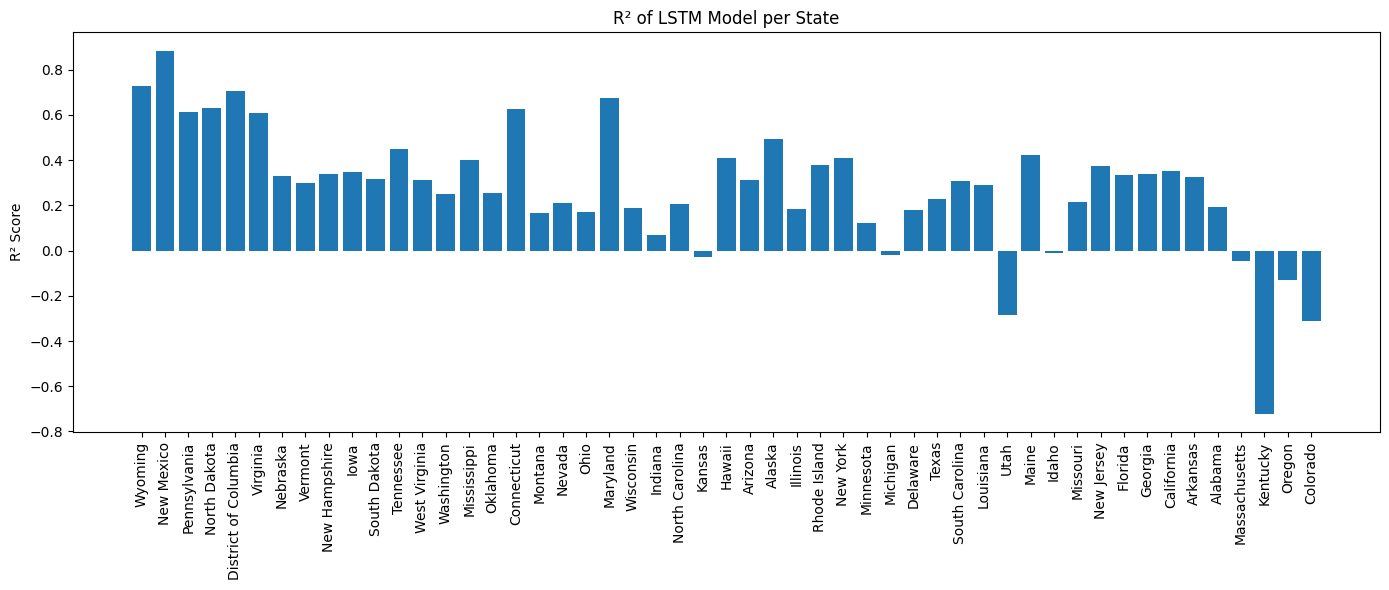

In [16]:

# --- Load and Prepare Dataset ---
df = pd.read_csv("Tony_data/merged_data.csv", parse_dates=["month"])
df = df.sort_values(["state", "month"])

# --- Setup parameters ---
window = 12  # number of months in input window
target_col = ["Unemployment Rate"]
input_features = ["Unemployment Rate", "median_income", "population", "lfp_rate", "initial_claims"]
rmse_dict = {}
r2_dict = {}

for state in df['state'].unique():
    try:
        df_state = df[df['state'] == state].copy().sort_values("month").reset_index(drop=True)

        df_train, df_test, scaler, imputer = scale_and_split(df_state)

        df_all = pd.concat([df_train, df_test]).reset_index(drop=True)
        X_all, y_all = create_sequences(df_all, window)

        # Train/val/test split
        train_size = len(df_train) - window
       

        X_train, y_train = X_all[:train_size], y_all[:train_size]
        X_test, y_test = X_all[train_size:], y_all[train_size:]

        model = build_lstm_model(input_shape=(window, len(input_features)))

        early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

        model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=16, verbose=0, callbacks=[early_stop])

        y_pred = model.predict(X_test).flatten()
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        rmse_dict[state] = rmse
        r2_dict[state] = r2

        print(f"✅ {state}: RMSE = {rmse:.4f}, R² = {r2:.4f}")
        
    except Exception as e:
        print(f"Error in {state}: {e}")

# --- Plot Results ---
import matplotlib.pyplot as plt

# Sort values by RMSE
states_sorted = sorted(rmse_dict, key=rmse_dict.get)

# Plot RMSE
plt.figure(figsize=(14, 6))
plt.bar(states_sorted, [rmse_dict[state] for state in states_sorted])
plt.xticks(rotation=90)
plt.title("RMSE of LSTM Model per State")
plt.ylabel("RMSE")
plt.tight_layout()
plt.show()

# Plot R²
plt.figure(figsize=(14, 6))
plt.bar(states_sorted, [r2_dict[state] for state in states_sorted])
plt.xticks(rotation=90)
plt.title("R² of LSTM Model per State")
plt.ylabel("R² Score")
plt.tight_layout()
plt.show()
